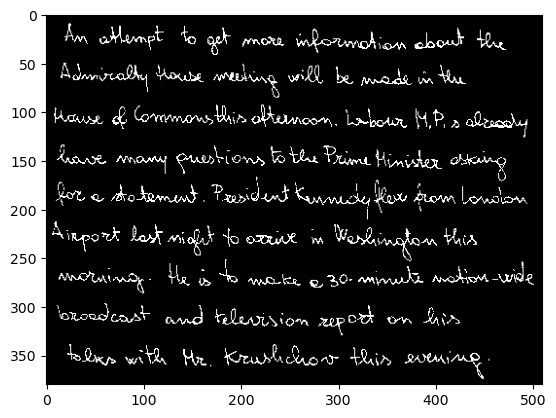

Average width of components: 15.004219409282701


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread("image_1_IAM.jpg", cv2.IMREAD_GRAYSCALE)

# Binarize the image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.show()
# Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image)

# Calculate the average width of components
component_widths = stats[1:, cv2.CC_STAT_WIDTH]  # Exclude the background
average_width = np.mean(component_widths)
print(f"Average width of components: {average_width}")


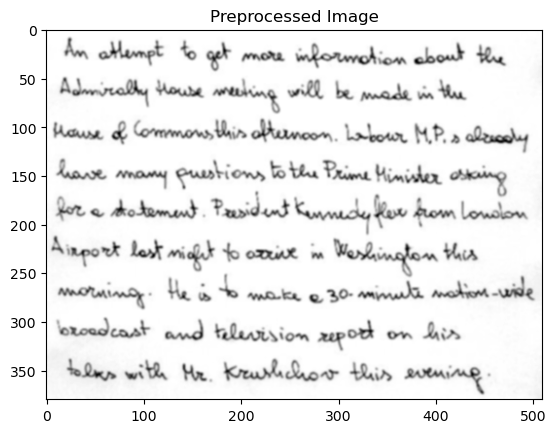

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image_1_IAM.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to grayscale and preprocess
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Display the preprocessed image
plt.imshow(blurred, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


In [3]:
component_widths

array([24, 49,  9, 15, 24, 82, 29, 30, 21,  2,  7, 24, 18,  2, 24,  2, 10,
        3,  2, 51,  2, 19, 29,  1, 18, 49,  2,  2,  2,  3,  9, 35, 17, 19,
       13, 12,  3, 52, 15, 18, 52, 15, 15, 51,  3,  4,  1,  2, 11,  2, 10,
       63, 65, 10, 22,  2, 31, 38,  8,  2,  1,  2,  4, 10, 13, 15, 30,  1,
       51, 11,  3,  2, 38,  2, 39, 20, 10, 39,  2,  2, 57, 31,  3, 23,  2,
       17,  8,  2,  3,  5,  1,  2,  1, 16, 63, 12, 29,  1,  1,  3,  1,  1,
        2,  8, 77, 34,  3, 30, 43,  1, 14,  1, 23,  3,  1,  7,  3, 37,  1,
       27,  3,  1,  1,  1,  2,  1,  1, 12, 33,  7,  2, 12, 19, 30,  1, 23,
       16,  2, 41, 18,  2,  2,  2, 19,  2, 52,  2,  8, 14,  2,  2, 10,  3,
       12,  2, 16,  3,  2, 10, 12, 49, 38,  2,  3, 19,  3,  2, 50,  1, 32,
        9,  9,  7, 21, 15,  9,  3, 12, 11, 13, 34, 17,  2, 15, 14,  3,  6,
       21,  2, 10, 38, 17,  5, 10, 48,  1,  1, 10, 19, 31,  1,  2, 16,  3,
        8, 14,  9, 25,  3,  9, 14, 27,  3,  1, 14, 13, 22,  7, 35, 48, 10,
        4, 24, 16,  1, 33

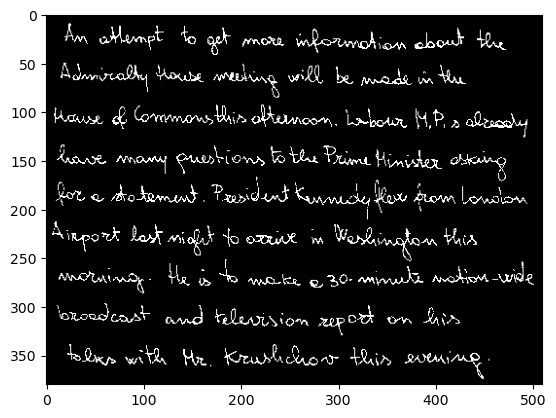

Average width of components: 15.004219409282701


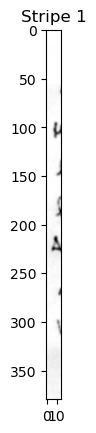

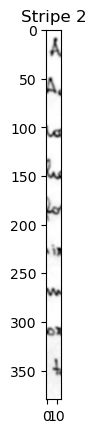

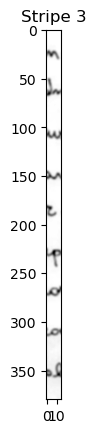

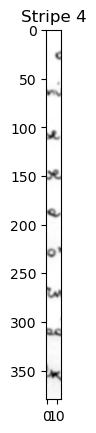

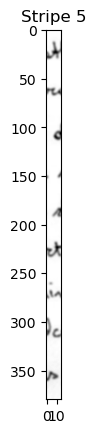

In [4]:
# Calculate connected components
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.show()
# Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image)

# Calculate the average width of components
component_widths = stats[1:, cv2.CC_STAT_WIDTH]  # Exclude the background
average_width = np.mean(component_widths)
print(f"Average width of components: {average_width}")

# num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(255 - blurred)

# Calculate average width of connected components
# component_widths = stats[:, cv2.CC_STAT_WIDTH]
# stripe_width = int(np.median(component_widths))
stripe_width = int(average_width)

# Split image into vertical stripes
height, width = blurred.shape
stripes = [blurred[:, i:i + stripe_width] for i in range(0, width, stripe_width)]

# Visualize a few stripes
for idx, stripe in enumerate(stripes[:5]):
    plt.imshow(stripe, cmap='gray')
    plt.title(f"Stripe {idx + 1}")
    plt.show()


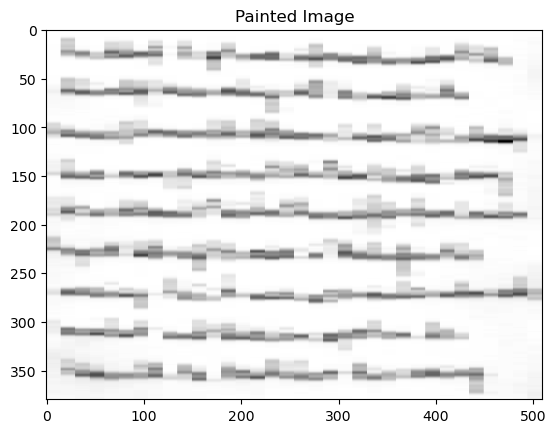

In [5]:
painted_image = np.zeros_like(blurred)

for i, stripe in enumerate(stripes):
    for row in range(stripe.shape[0]):
        avg_gray = np.mean(stripe[row, :])
        stripe[row, :] = avg_gray
    painted_image[:, i * stripe_width:(i + 1) * stripe_width] = stripe

# Display the painted image
plt.imshow(painted_image, cmap='gray')
plt.title("Painted Image")
plt.show()


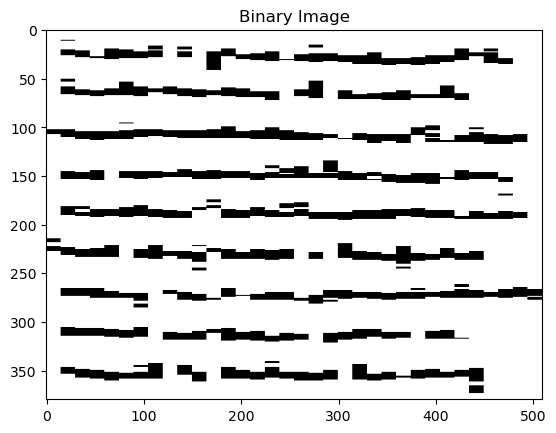

In [6]:
# Apply Otsu's thresholding
_, binary_image = cv2.threshold(painted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()


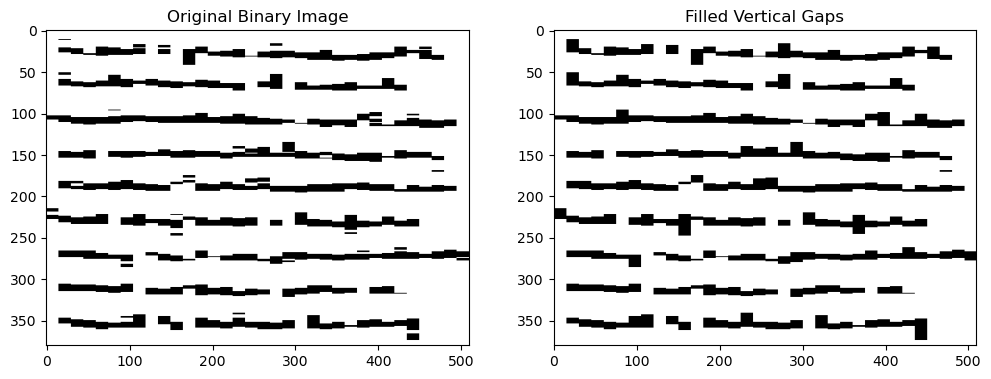

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# binary_image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure the image is binary
# _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Function to fill vertical gaps between black regions
def fill_vertical_gaps(image, gap_threshold):
    filled_image = image.copy()
    rows, cols = filled_image.shape

    for col in range(cols):
        start = None
        for row in range(rows):
            # Identify black regions (0) with white gaps (255)
            if filled_image[row, col] == 0:
                if start is not None:
                    # If a gap is detected between two black regions
                    gap_height = row - start - 1
                    if gap_height > 0 and gap_height <= gap_threshold:
                        # Fill the gap with black (0) if within the threshold
                        filled_image[start + 1:row, col] = 0
                start = row  # Update the start position

    return filled_image

# Define the vertical gap threshold
gap_threshold = 10  # Adjust based on your dataset

# Apply the vertical gap filling function
filled_image = fill_vertical_gaps(binary_image, gap_threshold)

# Display the original and filled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Vertical Gaps")
plt.imshow(filled_image, cmap='gray')
plt.show()


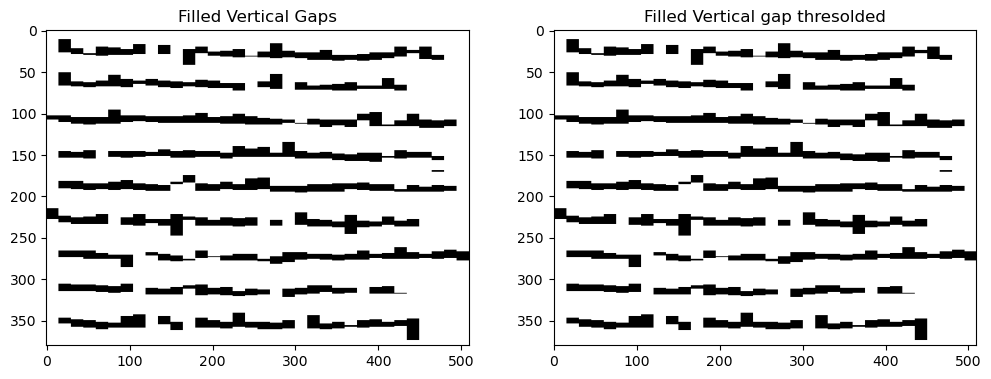

In [8]:
# algorithem which can remove the portion of black box or trim it if it's hight is more than thresold and
# width should be the strip size
threshold_width=4*stripe_width
sum_s = 1
filled_image_n=filled_image.copy()
for i in range(0, filled_image.shape[1], stripe_width):
    for j in range(0, filled_image.shape[0]-threshold_width):
        sum_s = np.sum(filled_image[j:j+threshold_width, i:i + stripe_width])
        if sum_s<=0:
            filled_image_n[j:j+threshold_width, i:i + stripe_width]=255
        
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Filled Vertical Gaps")
plt.imshow(filled_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Vertical gap thresolded")
plt.imshow(filled_image_n, cmap='gray')
plt.show()


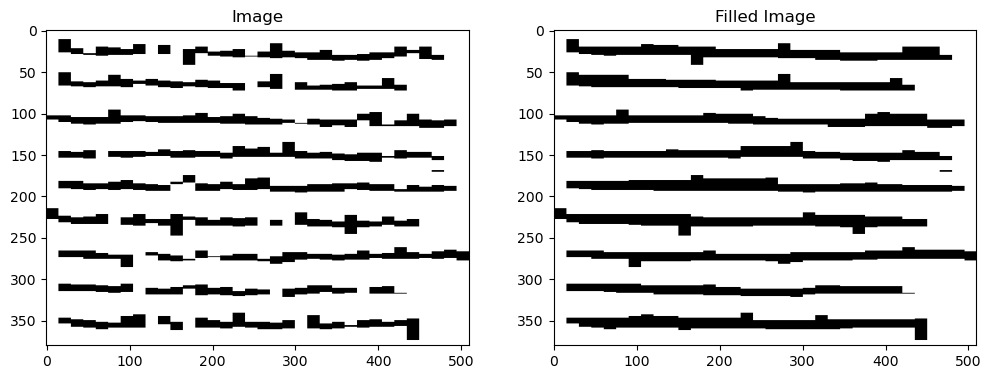

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# binary_image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure it's a binary image
# _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Function to fill white gaps between black regions
def fill_white_gaps(image, gap_threshold):
    filled_image = image.copy()
    rows, cols = filled_image.shape

    for row in range(rows):
        start = None
        for col in range(cols):
            # Identify black regions (0) with white gaps (255)
            if filled_image[row, col] == 0:
                if start is not None:
                    # If a gap is detected between two black regions
                    gap_width = col - start - 1
                    if gap_width > 0 and gap_width <= gap_threshold:
                        # Fill the gap with black (0) if within the threshold
                        filled_image[row, start + 1:col] = 0
                start = col  # Update the start position

    return filled_image

# Define the gap threshold
gap_threshold = stripe_width*4  # Adjust based on your dataset

# Apply the gap filling function
filled_image_n_n = fill_white_gaps(filled_image_n, gap_threshold)

# Display the original and filled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(filled_image_n, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Image")
plt.imshow(filled_image_n_n, cmap='gray')
plt.show()


Ensure you have OpenCV with ximgproc module installed. Falling back to custom thinning.


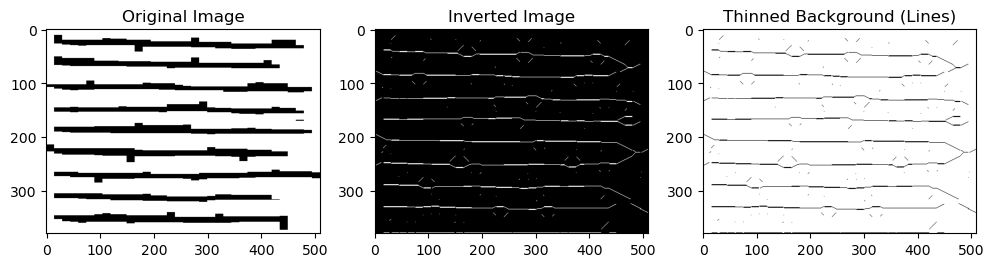

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure the image is binary
# _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Invert the binary image to focus on the background
# inverted_image = cv2.bitwise_not(filled_image_n_n)

# Apply skeletonization (thinning) to the inverted image
# Ensure OpenCV's ximgproc module is available
try:
    skeleton = cv2.ximgproc.thinning(inverted_image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
except AttributeError:
    print("Ensure you have OpenCV with ximgproc module installed. Falling back to custom thinning.")

    # Custom thinning method (basic iterative approach)
    def skeletonize(img):
        skel = np.zeros_like(img)
        eroded = np.zeros_like(img)
        temp = np.zeros_like(img)

        while True:
            # Erode the image
            eroded = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
            temp = cv2.dilate(eroded, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
            temp = cv2.subtract(img, temp)
            skel = cv2.bitwise_or(skel, temp)
            img = eroded.copy()

            if cv2.countNonZero(img) == 0:
                break

        return skel

    skeleton = skeletonize(filled_image_n_n)

# Invert the result back to represent thinned background
thinned_background = cv2.bitwise_not(skeleton)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(filled_image_n_n, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Inverted Image")
plt.imshow(skeleton, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Thinned Background (Lines)")
plt.imshow(thinned_background, cmap='gray')

plt.show()


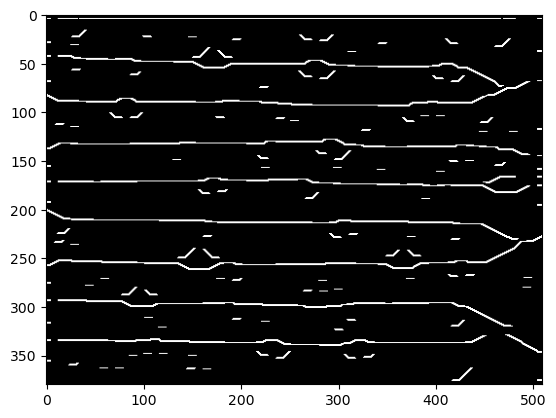

In [12]:
# Invert the image to make lines white and background black
inverted_image = cv2.bitwise_not(thinned_background)

# Define the horizontal Sobel-like filter
H = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]], dtype=np.float32)

# Apply the horizontal filter
for i in range(4):
    filtered_image = cv2.filter2D(inverted_image, -1, H)
    inverted_image=filtered_image
# Normalize and threshold the result
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
_, thresholded_image = cv2.threshold(filtered_image, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image, cmap='gray')

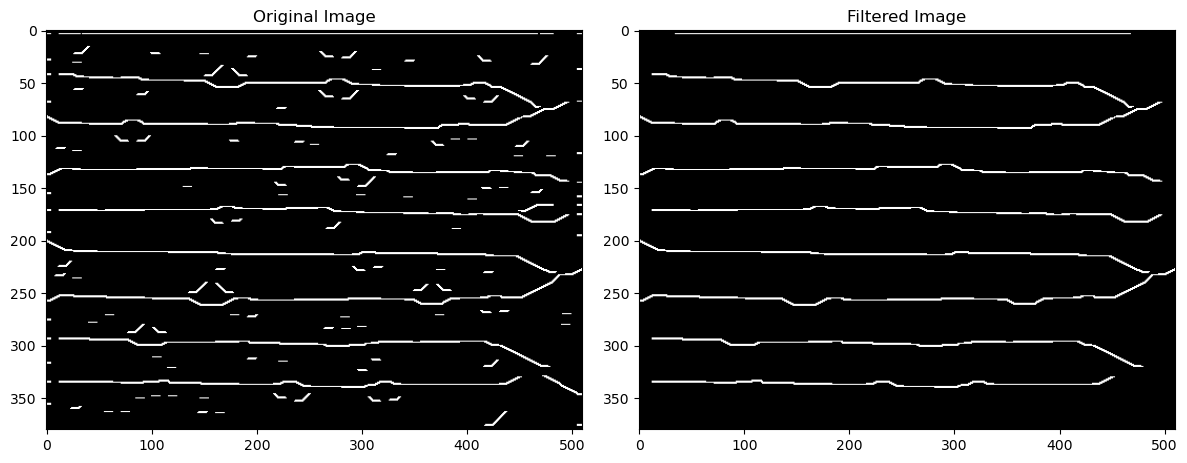

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
inverted_image = cv2.bitwise_not(thinned_background)
H = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]], dtype=np.float32)

# Apply the horizontal filter
for i in range(4):
    filtered_image = cv2.filter2D(inverted_image, -1, H)
    inverted_image=filtered_image
# Normalize and threshold the result
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
_, thresholded_image = cv2.threshold(filtered_image, 50, 255, cv2.THRESH_BINARY)
# Ensure the image is binary
# _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Perform connected component analysis
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(thresholded_image, connectivity=8)

# Get image dimensions
image_height, image_width = thresholded_image.shape

# Minimum line length (1/5th of image width)
min_length = image_width / 5

# Create an empty mask for the filtered image
filtered_image = np.zeros_like(thresholded_image)

# Loop through each component
for i in range(1, num_labels):  # Skip the background (label 0)
    x, y, w, h, area = stats[i]  # Bounding box and area
    if w > min_length:  # Keep only components with width greater than min_length
        filtered_image[labels == i] = 255

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(inverted_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')

plt.tight_layout()
plt.show()


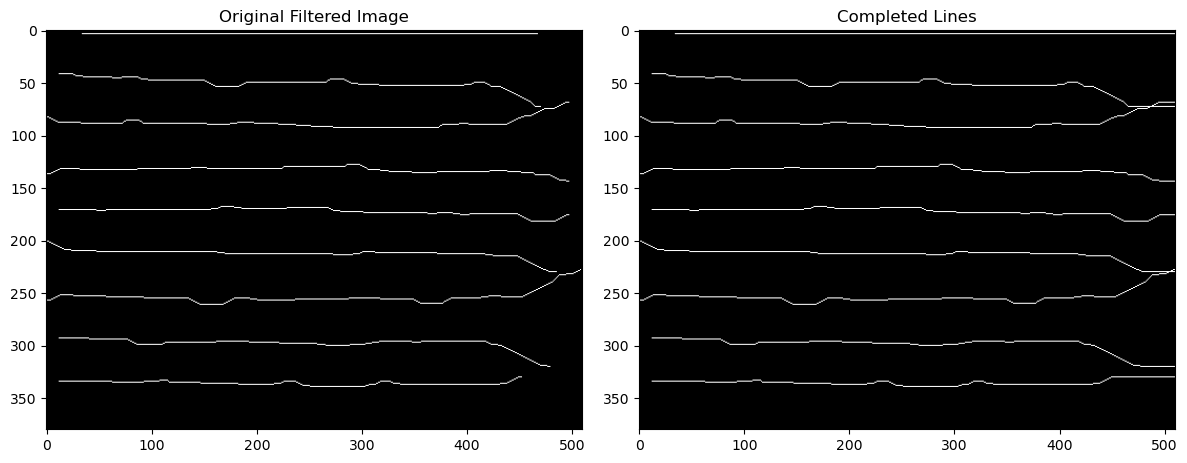

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# def find_endpoints(skeleton):
#     """
#     Find endpoints of a skeletonized binary image.
#     """
#     kernel = np.array([[1, 1, 1],
#                        [1, 10, 1],
#                        [1, 1, 1]], dtype=np.uint8)
#     neighbors = cv2.filter2D(skeleton.astype(np.uint8), -1, kernel)
#     endpoints = np.where((neighbors == 11) & (skeleton == 1))
#     endpoints_n =list(zip(endpoints[1], endpoints[0])) 
#     print('b',endpoints_n)
#     endpoints = [endpoint for endpoint in endpoints_n if endpoint[0]>(skeleton.shape[0]/10)]
#     print('a',endpoints)
#     n_lines = len(endpoints_n)-len(endpoints)
#     return endpoints,n_lines  # Return as (x, y) points

def find_endpoints(skeleton):
    """
    Find endpoints of a skeletonized binary image and determine their direction 
    (left or right) based on neighboring points.

    Args:
    - skeleton (numpy.ndarray): Skeletonized binary image.

    Returns:
    - endpoints (list): List of tuples (x, y, direction) where direction is determined by neighbors.
    - n_lines (int): Number of lines removed due to the filtering condition.
    """
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]], dtype=np.uint8)
    
    # Convolution to find neighbors of each pixel
    neighbors = cv2.filter2D(skeleton.astype(np.uint8), -1, kernel)
    
    # Identify endpoints (pixels with exactly one neighbor)
    endpoints = np.where((neighbors == 11) & (skeleton == 1))
    
    # Convert to list of (x, y) coordinates
    endpoints_n = list(zip(endpoints[1], endpoints[0]))
    # print('Before filtering:', endpoints_n)
    
    # Filter endpoints based on their x-coordinate
    endpoints_filtered = [endpoint for endpoint in endpoints_n if endpoint[0] > (skeleton.shape[0] / 10)]
    
    # Determine the direction of each endpoint
    endpoints_with_direction = []
    for endpoint in endpoints_filtered:
        x, y = endpoint
        
        # Check 8-connected neighbors
        neighbor_offsets = [(-1, -1), (-1, 0), (-1, 1),
                            (0, -1),         (0, 1),
                            (1, -1), (1, 0), (1, 1)]
        neighbor_offsets=1*neighbor_offsets
        neighbors = []
        for dx, dy in neighbor_offsets:
            nx, ny = x + dx, y + dy
            if 0 <= ny < skeleton.shape[0] and 0 <= nx < skeleton.shape[1] and skeleton[ny, nx] == 1:
                neighbors.append((nx, ny))
        
        # Determine the direction based on the position of the neighbor
        if neighbors:
            # print(neighbors)
            # Calculate the vector between the endpoint and the neighbor
            neighbor = neighbors[0]  # Take the first neighbor (assumes a single path)
            dx = x-neighbor[0] 
            dy = y-neighbor[1]
            
            # Determine direction
            if dx<0:  # Horizontal component dominates
                direction = 0 #'right'
            else:  # Vertical component dominates (for future modifications if needed)
                direction = 1 #'left'
        else:
            # print('No neighbours')
            direction = 0 #'undefined'  # Fallback if no valid neighbors are found
        
        endpoints_with_direction.append((x, y, direction))
    
    # print('After filtering with direction:', endpoints_with_direction)
    
    # Calculate number of removed lines
    n_lines = len(endpoints_n) - len(endpoints_filtered)
    
    return endpoints_with_direction, n_lines


def extend_horizontally(image, x, y, direction, max_length=50):
    """
    Extend the line horizontally from (x, y) in the given direction.
    """
    for i in range(1, max_length + 1):
        new_x = x + i * direction  # Extend horizontally
        if new_x < 0 or new_x >= image.shape[1]:
            break  # Stop if reaching the boundary
        image[y, new_x] = 1  # Set pixel value to white
    return image

def connect_lines(image, endpoints,n_lines, max_distance):
    """
    Connect nearby endpoints or extend lines horizontally if no match is found.
    """
    v_threshold = image.shape[0]/(n_lines*(1.2))
    image_n = image.copy()
    used = set()  # Track used endpoints
    for i, (x1, y1,direction) in enumerate(endpoints):
        if i in used:
            continue
        for j, (x2, y2,d) in enumerate(endpoints):
            if i != j and j not in used:
                distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                # print('yes',abs(y1 - y2),distance)

                if distance < max_distance and abs(y1 - y2) < v_threshold and d==0 and direction==1:  # Allow only horizontal-ish connecti
                    # print('yes',abs(y1 - y2),distance)
                    cv2.line(image_n, (x1, y1), (x2, y2), 1, 1)
                    used.add(i)
                    used.add(j)
                    break
        else:
            # If no match, extend the line horizontally
            if direction==1:
            # direction = 0 if x1 < image_n.shape[1] // 2 else 1  # Left or right
                # print(x1,y1,image.shape[1]-x1)
                image_n = extend_horizontally(image_n, x1, y1, direction,max_length= image.shape[1]-x1)
    return image_n

# Load the filtered binary image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(filtered_image, 127, 255, cv2.THRESH_BINARY)

# Skeletonize the image
skeleton = skeletonize(binary_image // 255).astype(np.uint8)

# Detect endpoints
endpoints,n_lines = find_endpoints(skeleton)
# print(endpoints,n_lines)
# Define maximum connection distance (1/10th of image width)
image_height, image_width = skeleton.shape
max_distance = image_width / 10

# Connect endpoints and extend lines horizontally
completed_image = connect_lines(skeleton, endpoints, n_lines, max_distance)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Filtered Image")
plt.imshow(skeleton, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Completed Lines")
plt.imshow(completed_image, cmap='gray')

plt.tight_layout()
plt.show()


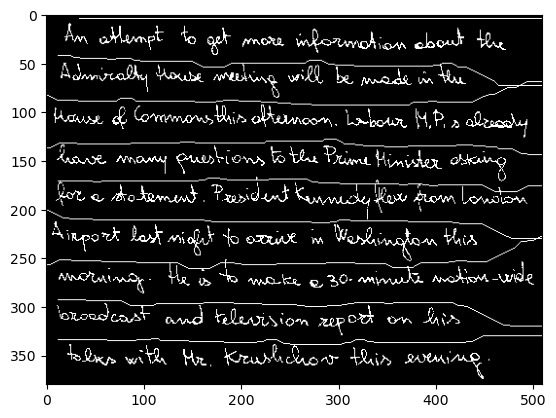

In [15]:
image = cv2.imread("image_1_IAM.jpg", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image+255*completed_image, cmap='gray')

Average width of components: 11.631578947368421


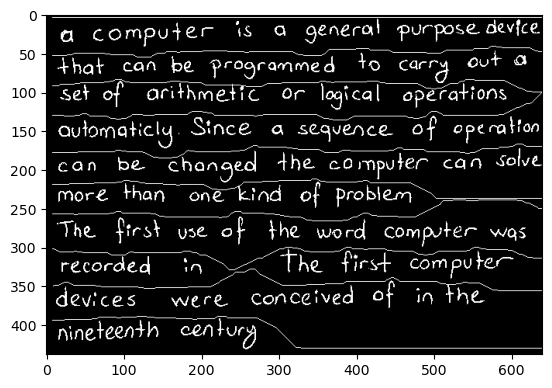

In [16]:
import main_func
image = cv2.imread("image_2_IAM.jpg", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

painted_image_binary,filled_image_n, filled_image_n_n, filtered_image,completed_image= main_func.PPA_Algo(image)
plt.imshow(binary_image+255*completed_image, cmap='gray')


Average width of components: 15.004219409282701


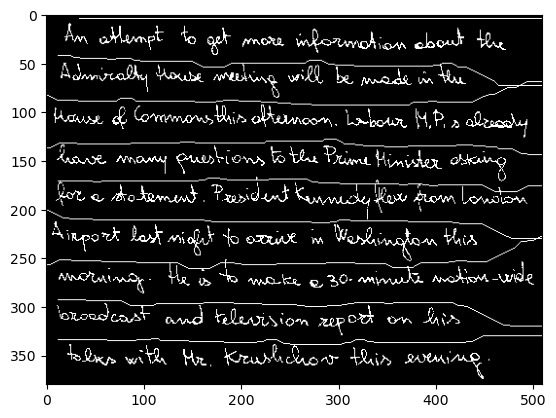

In [17]:
image = cv2.imread("image_1_IAM.jpg", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

painted_image_binary,filled_image_n, filled_image_n_n, filtered_image,completed_image= main_func.PPA_Algo(image)
plt.imshow(binary_image+255*completed_image, cmap='gray')


In [ ]:
import matplotlib.pyplot as plt
import sys
sys.path.append("line_word_recognition_py_files")
from line_seg_1 import PPA_Algo_line


Average width of components: 11.631578947368421
number of lines detected: 10
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_0.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_1.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_2.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_3.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_4.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_5.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_6.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_7.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\image_2_IAM_8.

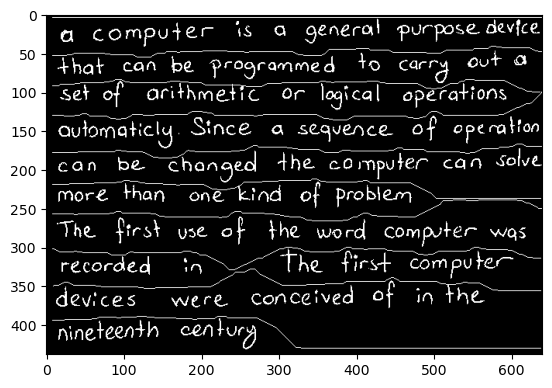

In [ ]:
# image = cv2.imread("image_1_IAM.jpg", cv2.IMREAD_GRAYSCALE)
# _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

output_folder = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\"
# D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper
image_name = "image_2_IAM"
painted_image_binary,filled_image_n, filled_image_n_n, filtered_image,completed_image, d_image= PPA_Algo_line("image_2_IAM.jpg",output_folder,image_name )
plt.imshow(d_image, cmap='gray')


Average width of components: 14.787878787878787
number of lines: 6
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\image_2_IAM_0_0.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\image_2_IAM_0_1.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\image_2_IAM_0_2.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\image_2_IAM_0_3.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\image_2_IAM_0_4.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\image_2_IAM_0_5.png


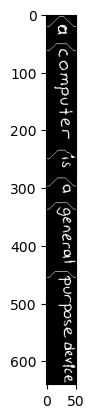

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("line_word_recognition_py_files")
from word_seg_2 import PPA_Algo_word

# image = cv2.imread("image_1_IAM.jpg", cv2.IMREAD_GRAYSCALE)
# _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
line_img_path = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\"+ "image_2_IAM_0.png"
output_folder = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\"
# D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper
image_name = "image_2_IAM_0"
painted_image_binary,filled_image,thresholded_image, filtered_image,skeleton,completed_image, d_image= PPA_Algo_word(line_img_path,output_folder,image_name )
plt.imshow(d_image, cmap='gray')


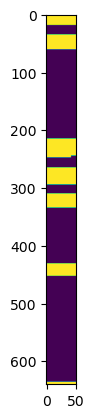

In [2]:
# painted_image_binary,filled_image,thresholded_image, filtered_image,skeleton,completed_image, d_image
plt.imshow(filled_image)

In [3]:
import word_recog_3
output_folder = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\"
word_r = word_recog_3.HandwrittenTextExtractor()
word_r.predict_text(output_folder, "image_1_IAM_0")

c:\Users\JANAKSINH\.conda\envs\AI_pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\JANAKSINH\.conda\envs\AI_pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\JANAKSINH\.conda\envs\AI_pytorch\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change accord

[('image_1_IAM_0_0.png', '0 0'),
 ('image_1_IAM_0_1.png', 'economic'),
 ('image_1_IAM_0_2.png', 'to get'),
 ('image_1_IAM_0_3.png', '0 0'),
 ('image_1_IAM_0_4.png', 'in Reconvention should'),
 ('image_1_IAM_0_5.png', '32 0'),
 ('image_1_IAM_0_6.png', '0 0')]

In [4]:
word_r.predict_text(output_folder, "image_2_IAM_0")


[('image_2_IAM_0_0.png', 'a'),
 ('image_2_IAM_0_1.png', "computer . '"),
 ('image_2_IAM_0_2.png', 'is'),
 ('image_2_IAM_0_3.png', 'a'),
 ('image_2_IAM_0_4.png', 'general'),
 ('image_2_IAM_0_5.png', 'purpose device')]

In [1]:
# input_img_path = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\image_2_IAM.jpg"
# image_name = "image_2_IAM" 
# output__line_folder_path = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\"
# output__word_folder_path = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\"
! python "D:\Digital Image Processing\Project\git_hub\DIP_Project\line_word_recognition_py_files\main.py" "image_2_IAM.jpg" "image_2_IAM" "D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\" "D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\"

Average width of components: 11.631578947368421
number of lines detected: 10
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_0.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_1.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_2.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_3.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_4.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_5.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_6.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_7.png
True_Saved: D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\image_2_IAM_8.png
True_

c:\Users\JANAKSINH\.conda\envs\AI_pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\JANAKSINH\.conda\envs\AI_pytorch\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future ch

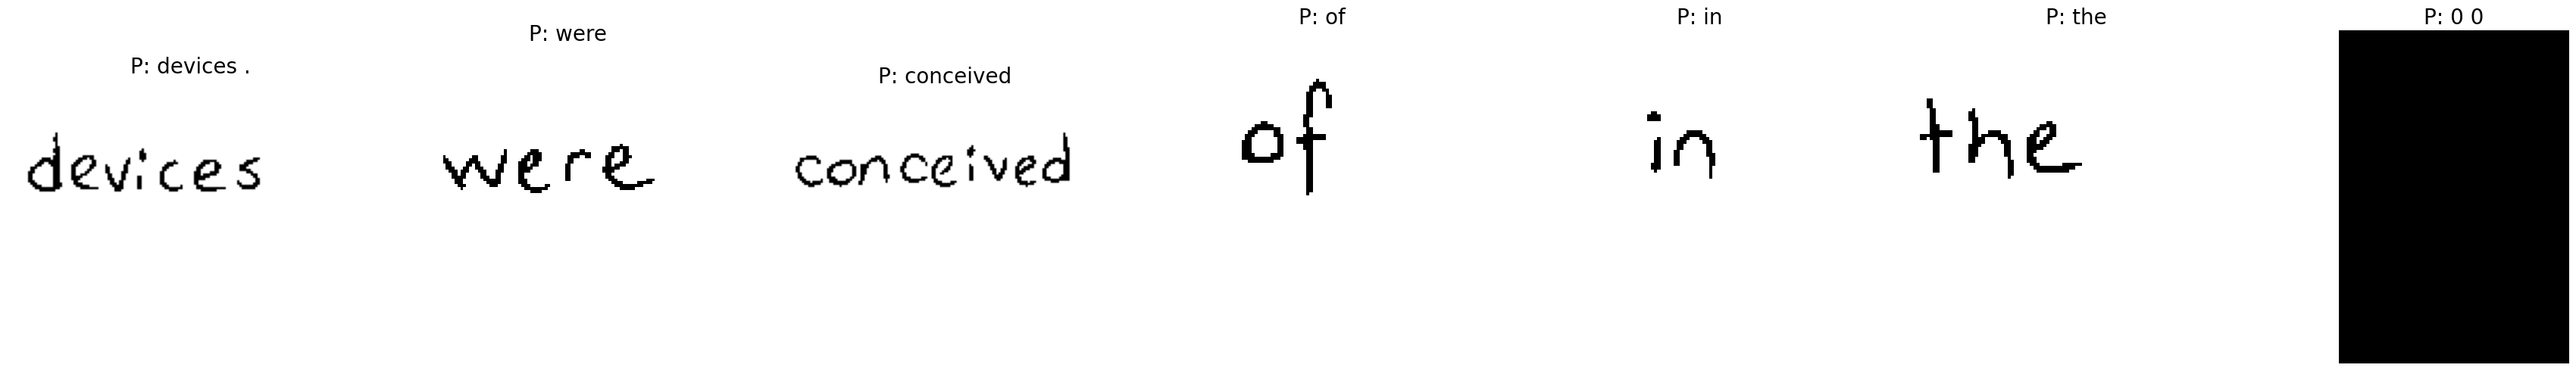

In [16]:
import matplotlib.pyplot as plt
import os
from PIL import Image

results = [('image_2_IAM_8_0.png', 'devices .'), ('image_2_IAM_8_1.png', 'were'), ('image_2_IAM_8_2.png', 'conceived'), ('image_2_IAM_8_3.png', 'of'), ('image_2_IAM_8_4.png', 'in'), ('image_2_IAM_8_5.png', 'the'), ('image_2_IAM_8_6.png', '0 0')]
fig, axes = plt.subplots(1,len(results), figsize=(5*len(results), 5 ))
output__word_folder_path = r"D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper_words\\"

for i, ax in enumerate(axes):
    image_path = os.path.join(output__word_folder_path, results[i][0])
    image = Image.open(image_path)
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"P: {results[i][1]}", fontsize=20)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()